- Importlah file weight-height.csv
- Pilihlah kolom Gender, Height (dalam inch), dan Weight (dalam pound)
- Lakukan cleaning data dengan menghilangkan data null pada kedua kolom tersebut
- Lakukan cleaning data terhadap outlier yang ada
- Dari data hasil cleaning, buat kolom baru 'BBI' yang isinya merupakan berat badan idealnya

**Rumus BBI:**
- wanita: (tinggi badan - 100) - (15% x (tinggi badan - 100))
- pria: (tinggi badan - 100) - (10% x (tinggi badan -100))

Keterangan untuk hitung BBI:
- Tinggi badan dalam cm (1 inch = 2.54 cm)
- Berat badan dalam Kg (1 pound = 0.45 kg)

<h1>Importlah file weight-height.csv</h1>

In [1]:
import pandas as pd
file_name = 'weightheight.xlsx' 
df = pd.read_excel(file_name)
print(df.head()) # print the first 5 rows

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


<h1>Pilihlah kolom Gender, Height (dalam inch), dan Weight (dalam pound)</h1>

In [2]:
df = df.filter(items=['Gender', 'Height', 'Weight'])
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.loc[374]

Gender    Male
Height     NaN
Weight     NaN
Name: 374, dtype: object

<h1>Lakukan cleaning data dengan menghilangkan data null pada kedua kolom tersebut</h1>

In [4]:
df[df['Height'].isnull()]

,Gender,Height,Weight
358,Male,NaN,216.097455
369,Male,NaN,209.637974
374,Male,NaN,NaN
377,Male,NaN,165.155899


In [5]:
df[df['Weight'].isnull()]

,Gender,Height,Weight
360,Male,69.008259,NaN
371,Male,71.003560,NaN
374,Male,NaN,NaN
380,Male,68.915864,NaN
10002,Female,61.944246,NaN


In [6]:
# menghapus baris yang mengandung null
df1 = df.dropna(axis=0, how='any')
# cek data null
df1[df1['Height'].isnull()]
df1[df1['Weight'].isnull()]

,Gender,Height,Weight


In [7]:
df1[df1['Weight'].isnull()]

,Gender,Height,Weight


In [8]:
df1[df1['Height'].isnull()]

,Gender,Height,Weight


In [9]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


<h1>Lakukan cleaning data terhadap outlier yang ada</h1>

In [10]:
# mengidentifikasi outliers via scatter plot

import matplotlib.pyplot as plt
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# memilih data yang tidak mengandung outliers
import numpy as np

meanHeight = df['Height'].mean()
stdHeight = df['Height'].std()
meanWeight = df['Weight'].mean()
stdWeight = df['Weight'].std()

dataClean = df[(np.abs((df['Height']-meanHeight)/stdHeight) <= 3) 
                 & (np.abs((df['Weight']-meanWeight)/stdWeight) <= 3)]

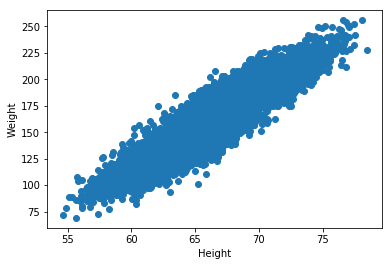

In [12]:
# mengidentifikasi outliers via scatter plot

import matplotlib.pyplot as plt
plt.scatter(dataClean['Height'], dataClean['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()

<h1>Dari data hasil cleaning, buat kolom baru 'BBI' yang isinya merupakan berat badan idealnya</h1>
<b>Rumus BBI:</b>
wanita: (tinggi badan - 100) - (15% x (tinggi badan - 100))<br>
pria: (tinggi badan - 100) - (10% x (tinggi badan -100))<br>

<b>Keterangan untuk hitung BBI:</b>
Tinggi badan dalam cm (1 inch = 2.54 cm)<br>
Berat badan dalam Kg (1 pound = 0.45 kg)

In [13]:
listBBI = []

for i, data in dataClean.iterrows():
    if data['Gender'] == 'Female':
        bbi = (data['Height'] * 2.54 - 100) - (0.15 * (data['Height'] * 2.54 - 100))
    elif data['Gender'] == 'Male':
        bbi = bbi = (data['Height'] * 2.54 - 100) - (0.1 * (data['Height'] * 2.54 - 100))
    listBBI.append(bbi/0.45)

dataClean['BBI'] = listBBI
dataClean

/home/hammsidh/Work/digitalent/digitalent/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Gender,Height,Weight,BBI
0,Male,73.847017,241.893563,175.142846
1,Male,68.781904,162.310473,149.412073
2,Male,74.110105,212.740856,176.479335
3,Male,71.730978,220.042470,164.393370
4,Male,69.881796,206.349801,154.999523
5,Male,67.253016,152.212156,141.645320
6,Male,68.785081,183.927889,149.428213
7,Male,68.348516,167.971110,147.210459
8,Male,67.018950,175.929440,140.456264
9,Male,63.456494,156.399676,122.358989


In [18]:
ideal = []
for i,brt in dataClean.iterrows():
    if 10 >= brt['Weight'] - brt['BBI'] <=10:
        ideal.append('Ideal')
#     elif brt['BBI'] - brt['Weight'] <=10:
#         ideal.append('Ideal')
    else:
        ideal.append('Not Ideal')
        
dataClean['BBI Status'] = ideal
dataClean

/home/hammsidh/Work/digitalent/digitalent/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Gender,Height,Weight,BBI,BBI Status
0,Male,73.847017,241.893563,175.142846,Not Ideal
1,Male,68.781904,162.310473,149.412073,Not Ideal
2,Male,74.110105,212.740856,176.479335,Not Ideal
3,Male,71.730978,220.042470,164.393370,Not Ideal
4,Male,69.881796,206.349801,154.999523,Not Ideal
5,Male,67.253016,152.212156,141.645320,Not Ideal
6,Male,68.785081,183.927889,149.428213,Not Ideal
7,Male,68.348516,167.971110,147.210459,Not Ideal
8,Male,67.018950,175.929440,140.456264,Not Ideal
9,Male,63.456494,156.399676,122.358989,Not Ideal
